# Example of finding protein interface

Goal: Find insights regarding the interface between proteins complexes:

- SARS-CoV-2 spike protein (prot_A, monomer)
- Angiotensin-converting enzyme 2 - ACE2 (prot_B, monomer)
- Antibody P5A3C8 (prot_H and prot_L, dimer)


Structural information available in Protein Data Bank:

- [6M0J: Crystal structure of SARS-CoV-2 spike receptor-binding domain bound with ACE2](https://www.rcsb.org/structure/6M0J)

- [7Z0X: THSC20.HVTR26 Fab bound to SARS-CoV-2 Receptor Binding Domain](https://www.rcsb.org/structure/7Z0X)


In [1]:
import os
import pandas as pd

#Customized Classes and methods by M. Penaloza-Amion
from my_tools import *

/Users/mon/opt/anaconda3/envs/instadeep_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Interface Analysis of Monomer-Monomer system (PDB:6M0J)

<img src="./images/prot_AB_chain1.png" width= "80%">


In [2]:
#creating working directory and changing directory

os.system('mkdir 6M0J_Analysis')
os.chdir('6M0J_Analysis')

In [3]:
!ls

In [5]:


#First a instance of MyPDBTool is created adding the name of PDB file that is going to be analysed
PDB_6M0J = MyPDBTool('../6m0j')
#then we load the file.
PDB_6M0J.load_pdb()

In [6]:
#Using method describe to now basic information of the PDB file structure
PDB_6M0J.describe()

*** PDB file ../6m0j.pdb ***
Total of chains: 6
Chains available: [<Segment A>, <Segment E>, <Segment A>, <Segment E>, <Segment A>, <Segment E>]
Total atoms : 6571
total residues : 878
*******************************
<Segment A>
Chain id : 0
Total atoms : 4877
Total residues : 597
*******************************
<Segment E>
Chain id : 1
Total atoms : 1542
Total residues : 194
*******************************
<Segment A>
Chain id : 2
Total atoms : 58
Total residues : 6
*******************************
<Segment E>
Chain id : 3
Total atoms : 14
Total residues : 1
*******************************
<Segment A>
Chain id : 4
Total atoms : 71
Total residues : 71
*******************************
<Segment E>
Chain id : 5
Total atoms : 9
Total residues : 9
*******************************


In [7]:
# According to number of residues and the chain id information from describe method, SARS-CoV-2 spike protein is chain_id : 1 and ACE2 is chain_id: 0.
prot_A = PDB_6M0J.select_chain(1)
prot_B = PDB_6M0J.select_chain(0)

In [8]:
# A new object is created to analyse the interface between both proteins

contacts_6M0J = ProteinAProteinB(prot_A, prot_B, PDB_6M0J.dimensions())

In [9]:
# with method search_protein_A_protein_B_interface residues in protein A and B are scanned with a cutoff.

cutoff = 8
second_prot_name = 'B'
contacts_6M0J_df = contacts_6M0J.search_protein_A_protein_B_interface(cutoff, second_prot_name)

*** PDB files with modified occupancies were generated ***
*** Contact matrix csv file was generated ***


In [10]:
#display in pandas DF the closest 5 residue contacts
contacts_6M0J_df.head(5)

,Prot_A res_id,Prot_B res_id,Distance (Angstrom)
0,TYR-505,LYS-353,4.24
1,GLY-502,GLY-354,4.48
2,ASN-501,LYS-353,5.04
3,ASN-487,GLN-24,5.74
4,THR-500,ASP-355,5.89


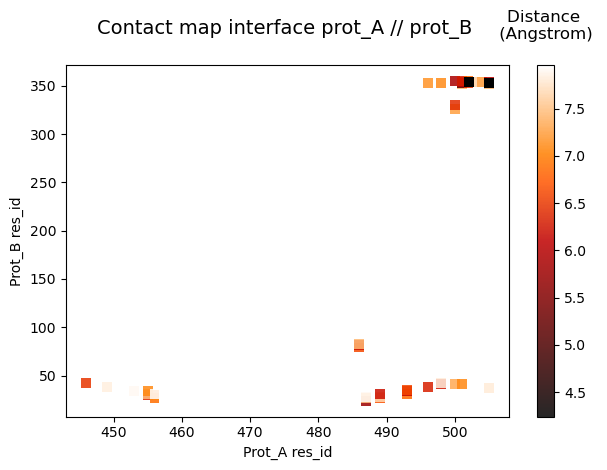

In [11]:
# Now we can plot the result of the residue interface search

contacts_6M0J.interface_contacts_plot(second_prot_name)

***** Aminoacid restype % prot_A ****
non-polar count : 70.6 %
polar charged count : 29.5 %
positive count : 0 %
negative count : 0 %
********* 

***** Aminoacid restype % prot_B ****
non-polar count : 40.0 %
polar charged count : 20.0 %
positive count : 15.0 %
negative count : 25.0 %
********* 



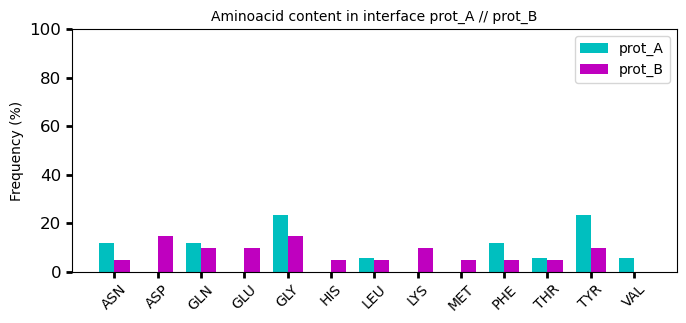

In [12]:
#The frequency of aminoacids involve in the interface interaction is visualized as bar plot
contacts_6M0J.aminoacid_content(second_prot_name)

### Image generated with VMD and PDB with modified occupancy values

<img src="./images/prot_AB_chain3.png" width= "80%">


In [13]:
# going back to main directory
os.chdir('../')
!pwd

/Users/mon/Desktop/Desktop/InstaDeep_technical_assignment_M_Penaloza-Amion


## 2. Interface Analysis of Monomer-Dimer system (PDB:7Z0X)

<img src="./images/prot_AHL_chain1.png" width= "80%">





In [14]:
#creating working directory and changing directory
os.system('mkdir 7Z0X_Analysis')
os.chdir('7Z0X_Analysis')
!pwd

/Users/mon/Desktop/Desktop/InstaDeep_technical_assignment_M_Penaloza-Amion/7Z0X_Analysis


In [15]:
#First a instance of MyPDBTool is created adding the name of PDB file that is going to be analysed
PDB_7Z0X = MyPDBTool('../7z0x')
#then we load the file.
PDB_7Z0X.load_pdb()
#and display information
PDB_7Z0X.describe()

*** PDB file ../7z0x.pdb ***
Total of chains: 7
Chains available: [<Segment H>, <Segment L>, <Segment R>, <Segment A>, <Segment H>, <Segment L>, <Segment R>]
Total atoms : 10126
total residues : 1245
*******************************
<Segment H>
Chain id : 0
Total atoms : 3278
Total residues : 224
*******************************
<Segment L>
Chain id : 1
Total atoms : 3140
Total residues : 215
*******************************
<Segment R>
Chain id : 2
Total atoms : 3008
Total residues : 195
*******************************
<Segment A>
Chain id : 3
Total atoms : 61
Total residues : 3
*******************************
<Segment H>
Chain id : 4
Total atoms : 200
Total residues : 169
*******************************
<Segment L>
Chain id : 5
Total atoms : 155
Total residues : 155
*******************************
<Segment R>
Chain id : 6
Total atoms : 284
Total residues : 284
*******************************


In [16]:
# According to number of residues and the chain id information from describe method, 
#SARS-CoV-2 spike protein is chain_id : 2 and 
#Antibody is split in two 
#chain Light (L) is chain :1 and 
#Heavy(H) is chain : 0.
#To avoid confusions original segment naming for antibody will remain.

prot_A2 = PDB_7Z0X.select_chain(2)
prot_L = PDB_7Z0X.select_chain(1)
prot_H = PDB_7Z0X.select_chain(0)

In [17]:
#a individual instance for each protein segment will be calculated

#for prot_A2 // prot_L

contacts_prot_A_prot_L = ProteinAProteinB(prot_A2, prot_L, PDB_7Z0X.dimensions())

In [18]:
#for prot_A2 // prot_L interface search algorithm
cutoff = 8
contacts_prot_A_prot_L_df = contacts_prot_A_prot_L.search_protein_A_protein_B_interface(cutoff, 'L')

*** PDB files with modified occupancies were generated ***
*** Contact matrix csv file was generated ***


In [19]:
#display in pandas DF the closest 5 residue contacts
contacts_prot_A_prot_L_df.head(5)

,Prot_A res_id,Prot_L res_id,Distance (Angstrom)
0,PHE-486,SER-95,5.7
1,GLY-485,SER-95,5.98
2,PHE-486,TYR-91,6.66
3,ASN-481,SER-94,7.21
4,THR-478,TYR-91,7.22


In [20]:
#for prot_A2 // prot_H
contacts_prot_A_prot_H = ProteinAProteinB(prot_A2, prot_H, PDB_7Z0X.dimensions())

In [21]:

contacts_prot_A_prot_H_df = contacts_prot_A_prot_H.search_protein_A_protein_B_interface(cutoff, 'H')

*** PDB files with modified occupancies were generated ***
*** Contact matrix csv file was generated ***


In [22]:
#display in pandas DF the closest 5 residue contacts
contacts_prot_A_prot_H_df.head(5)

,Prot_A res_id,Prot_H res_id,Distance (Angstrom)
0,GLY-485,TYR-52,4.44
1,GLU-484,SER-53,4.66
2,GLU-484,SER-56,5.3
3,TYR-489,SER-53,5.47
4,GLY-485,SER-53,5.55


### Image generated with VMD and PDB with modified occupancy values

<img src="./images/prot_AHL_chain9.png" width= "80%">

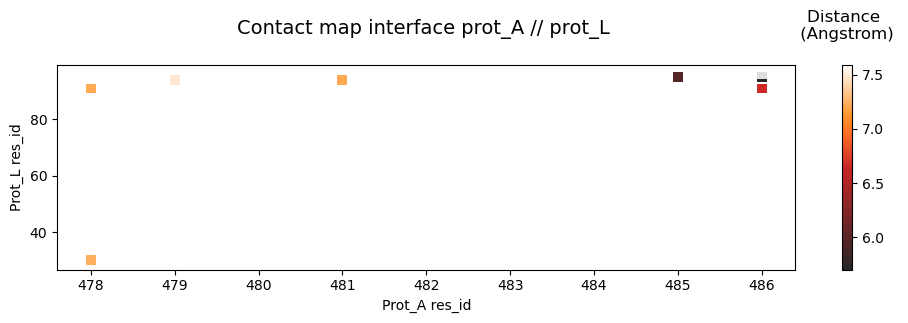

In [23]:
#ploting contact maps for prot_A and prot_L
contacts_prot_A_prot_L.interface_contacts_plot('L')

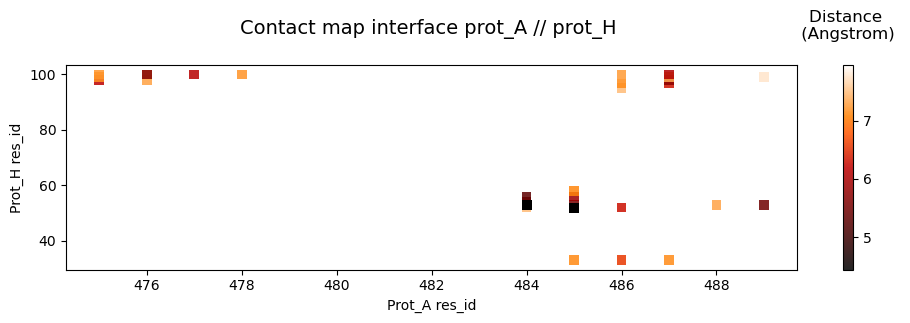

In [24]:
#ploting contact maps for prot_A and prot_H
contacts_prot_A_prot_H.interface_contacts_plot('H')

***** Aminoacid restype % prot_A ****
non-polar count : 60.0 %
polar charged count : 30.0 %
positive count : 0 %
negative count : 10.0 %
********* 

***** Aminoacid restype % prot_L ****
non-polar count : 78.5 %
polar charged count : 14.3 %
positive count : 0 %
negative count : 7.1 %
********* 



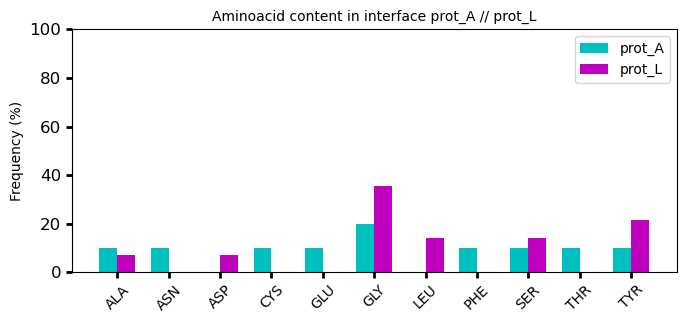

In [25]:
#Aminoacid content in interface prot_A and prot_L
contacts_prot_A_prot_H.aminoacid_content('L')

***** Aminoacid restype % prot_A ****
non-polar count : 60.0 %
polar charged count : 30.0 %
positive count : 0 %
negative count : 10.0 %
********* 

***** Aminoacid restype % prot_H ****
non-polar count : 78.5 %
polar charged count : 14.3 %
positive count : 0 %
negative count : 7.1 %
********* 



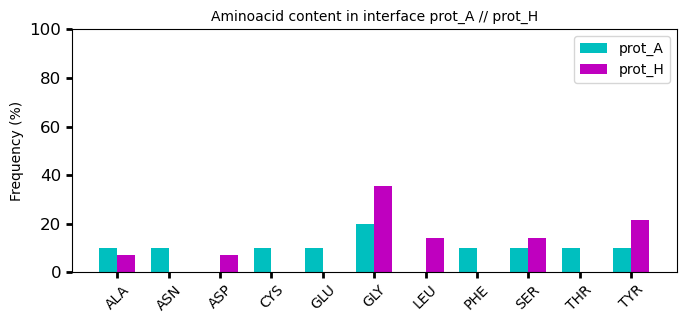

In [26]:
#Aminoacid content in interface prot_A and prot_H
contacts_prot_A_prot_H.aminoacid_content('H')